<a href="https://colab.research.google.com/github/aayushg1007/forecasting_using_time_series/blob/main/Stock_Prices_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [54]:
import yfinance as yf

ticker_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2020-12-31'

data = yf.download(ticker_symbol, start=start_date, end=end_date)

data.to_csv('stock_prices.csv')


[*********************100%%**********************]  1 of 1 completed


In [55]:
!pip install pmdarima

# Plotting ACF & PACF of the Data

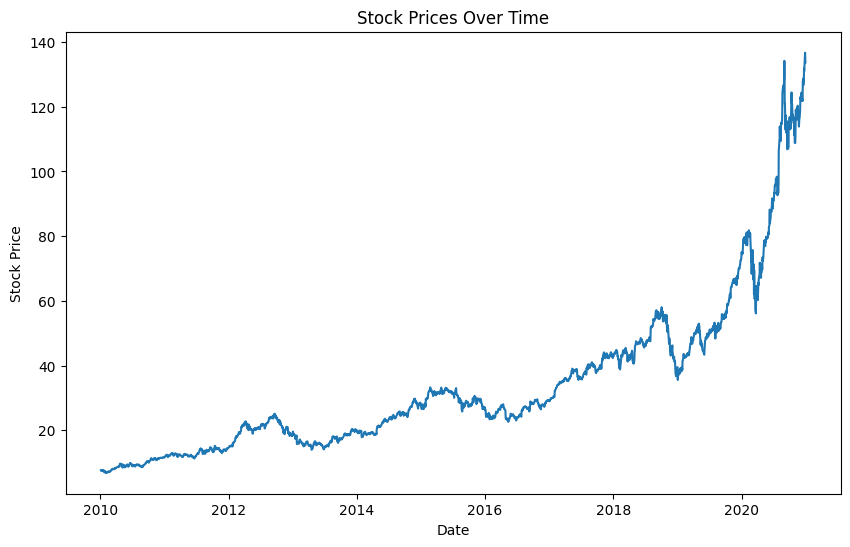

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

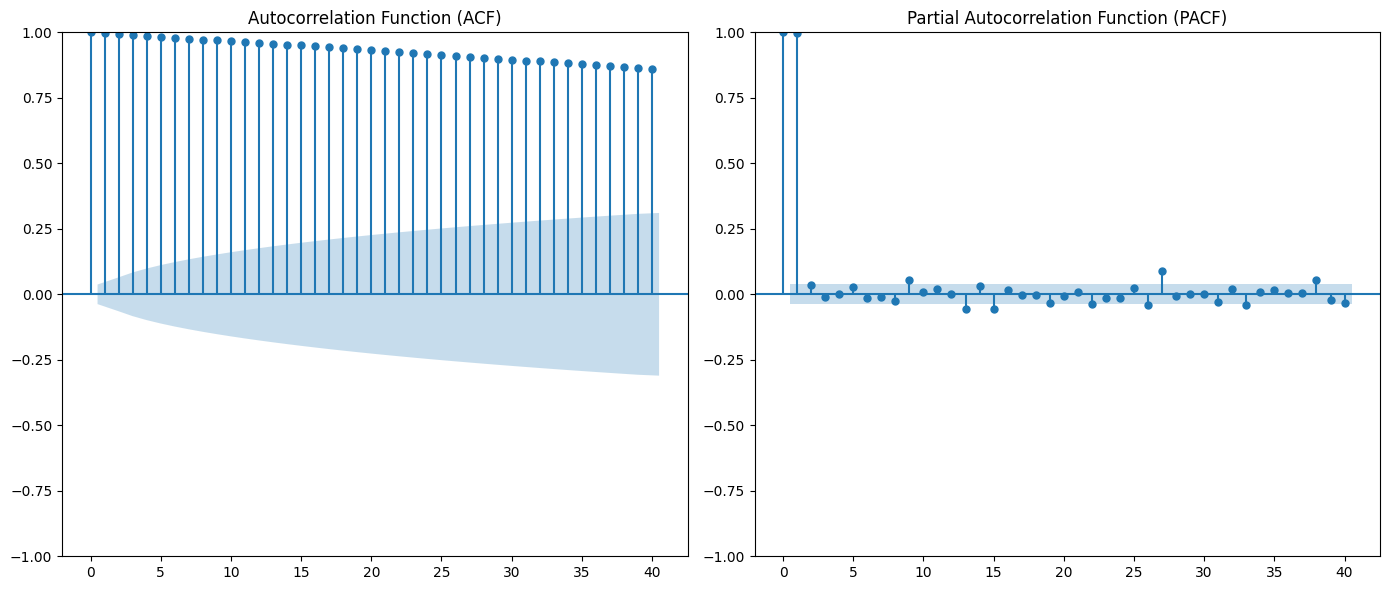

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(train, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(train, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

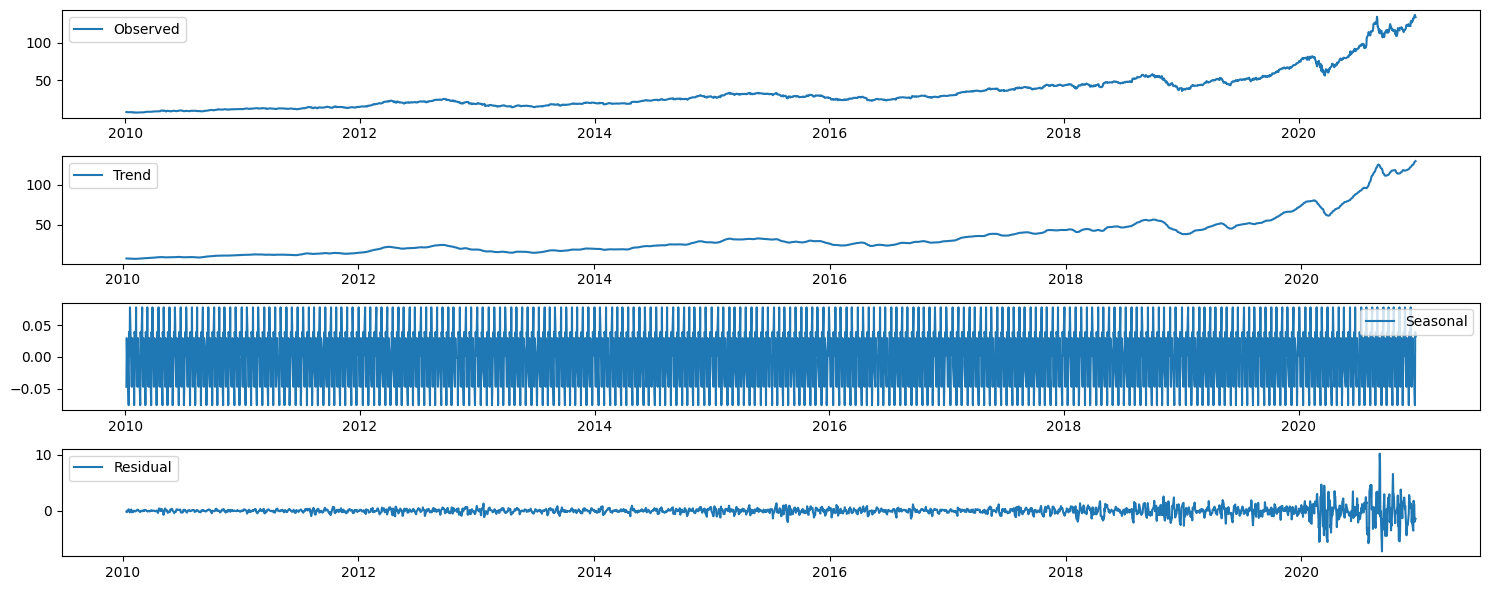

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='additive', period=12)

plt.figure(figsize=(15, 6))
plt.subplot(411)
plt.plot(df.index, decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(df.index, decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(df.index, decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

# Fitting Model
Using ARIMA and SARIMA Model we fit the training data into the model using `auto_arima` to get the best parameters

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

df = pd.read_csv('stock_prices.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

train = df['Close'][:-30]
test = df['Close'][-30:]


arima_model = auto_arima(train, start_p=1, start_q=1,
                         max_p=3, max_q=3, m=1,
                         start_P=0, seasonal=False,
                         d=1, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(arima_model.summary())

model_arima = ARIMA(train, order=arima_model.order)
model_fit_arima = model_arima.fit()

forecast_arima = model_fit_arima.forecast(steps=30)

sarima_model = auto_arima(train, start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

print(sarima_model.summary())

model_sarima = SARIMAX(train, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
model_fit_sarima = model_sarima.fit()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7077.553, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7126.059, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7079.973, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7083.780, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7129.923, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7079.399, Time=3.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7079.349, Time=5.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7079.859, Time=1.69 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7077.987, Time=1.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7081.545, Time=4.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7082.771, Time=0.90 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 19.705 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=21.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8871.358, Time=1.41 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8286.998, Time=2.68 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=11.97 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8836.187, Time=0.50 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7782.407, Time=3.89 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.52 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=6.65 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7812.375, Time=1.98 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7781.880, Time=3.47 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=8266.562, Time=1.55 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=18.21 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=11.60 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=7779.567, Time=6.69 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=8

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Forecasting
*   Predicting stock prices for the next 30 days which has not been seen by the models
*   Comparing it with the actual data from splitted testing data



In [ ]:
forecast_sarima = model_fit_sarima.forecast(steps=30)

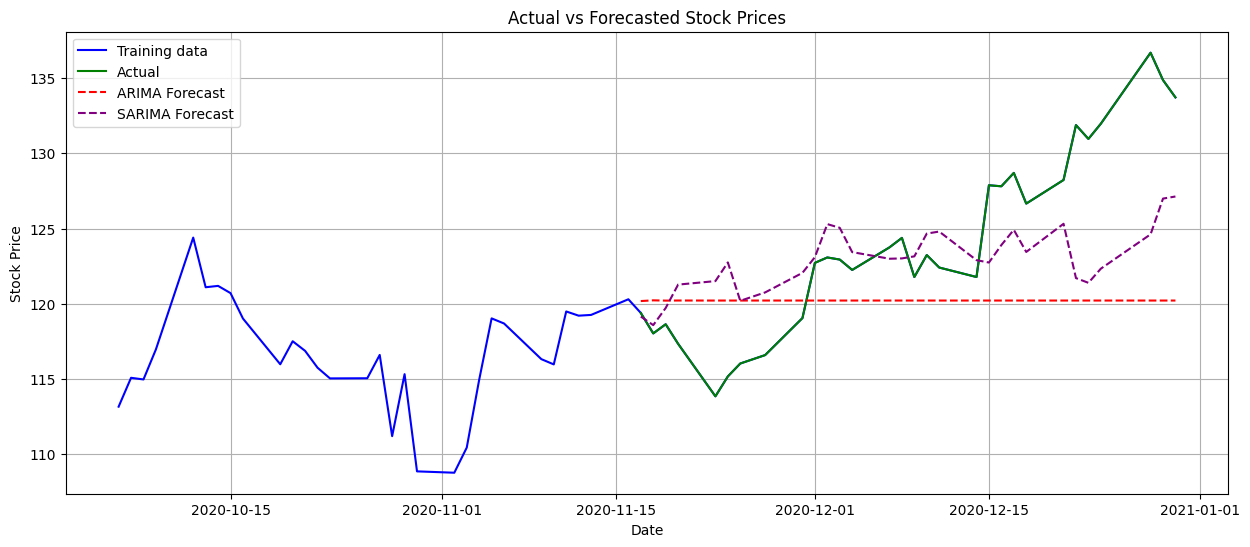

In [61]:
plt.figure(figsize=(15, 6))
plt.plot(df['Close'].index[-60:], df['Close'][-60:], label='Training data', color='blue')
plt.plot(test.index, test, label='Actual', color='green')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(test.index, forecast_sarima, label='SARIMA Forecast', color='purple', linestyle='--')
plt.title('Partial Autocorrelation Function (PACF)')
plt.title('Actual vs Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = np.finfo(np.float64).eps  # Small value to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

mse_arima = mean_squared_error(test, forecast_arima)
mse_sarima = mean_squared_error(test, forecast_sarima)

rmse_arima = np.sqrt(mse_arima)
rmse_sarima = np.sqrt(mse_sarima)

mae_arima = mean_absolute_error(test, forecast_arima)
mae_sarima = mean_absolute_error(test, forecast_sarima)

mape_arima = mean_absolute_percentage_error(test, forecast_arima)
mape_sarima = mean_absolute_percentage_error(test, forecast_sarima)

print(f'Mean Squared Error (ARIMA): {mse_arima}')
print(f'Root Mean Squared Error (ARIMA): {rmse_arima}')
print(f'Mean Absolute Error (ARIMA): {mae_arima}')
print(f'Mean Absolute Percentage Error (ARIMA): {mape_arima:.2f}%')

print(f'Mean Squared Error (SARIMA): {mse_sarima}')
print(f'Root Mean Squared Error (SARIMA): {rmse_sarima}')
print(f'Mean Absolute Error (SARIMA): {mae_sarima}')
print(f'Mean Absolute Percentage Error (SARIMA): {mape_sarima:.2f}%')



Mean Squared Error (ARIMA): 51.373546696918005
Root Mean Squared Error (ARIMA): 7.167534213166896
Mean Absolute Error (ARIMA): 5.699816561764754
Mean Absolute Percentage Error (ARIMA): 4.47%
Mean Squared Error (SARIMA): 27.163037411085337
Root Mean Squared Error (SARIMA): 5.211817093019031
Mean Absolute Error (SARIMA): 4.052289993356116
Mean Absolute Percentage Error (SARIMA): 3.21%
